In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast
import os
import sys

from pathlib import Path

lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)

# Append the absolute path to sys.path
sys.path.append(lib_path)

# Now, try importing onedmodel
from onedmodel import *

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [2]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [3]:
# Initialise
nSGD = 10**3
nsamples = 10**3
shuffle = True
batch_size= 20
w0 = 1.8
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = np.arange(1.2, 2, 0.1)
batch_range = np.arange(5, 60, 5)
lr_range = [0.01]
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, frac_max=frac_max)

Running experiment 0 over 88


In [4]:
df

,escape_rate,lr/B,w0,pvalue,intercept,fraction
0,-0.306873,0.020000,1.0,1.066057e-09,-1.228767,"[0.2447058823529412, 0.2, 0.15529411764705883,..."
1,-0.000023,0.002000,1.0,7.708841e-02,-1.131165,"[0.37415881561238223, 0.3243606998654105, 0.32..."
2,-0.000015,0.000200,1.0,1.005539e-01,-0.906734,"[0.4492462311557789, 0.40100502512562813, 0.40..."
3,-0.210427,0.010000,1.0,2.165326e-16,-1.297120,"[0.2634032634032634, 0.20279720279720279, 0.18..."
4,-0.000114,0.001000,1.0,7.260424e-02,-1.167194,"[0.37257617728531855, 0.31024930747922436, 0.3..."
...,...,...,...,...,...,...
670,-1.057266,0.000143,2.4,3.916646e-02,-2.496306,"[0.0855457227138643, 0.02654867256637168, 0.01..."
671,-0.003246,0.000014,2.4,1.052281e-01,-1.081198,"[0.38, 0.328, 0.328, 0.328, 0.328, 0.328, 0.32..."
672,NaN,0.001333,2.4,NaN,NaN,"[0.02158273381294964, 0.0, 0.0, 0.0, 0.0, 0.0,..."
673,-1.057266,0.000133,2.4,3.916646e-02,-2.496306,"[0.0855457227138643, 0.02654867256637168, 0.01..."


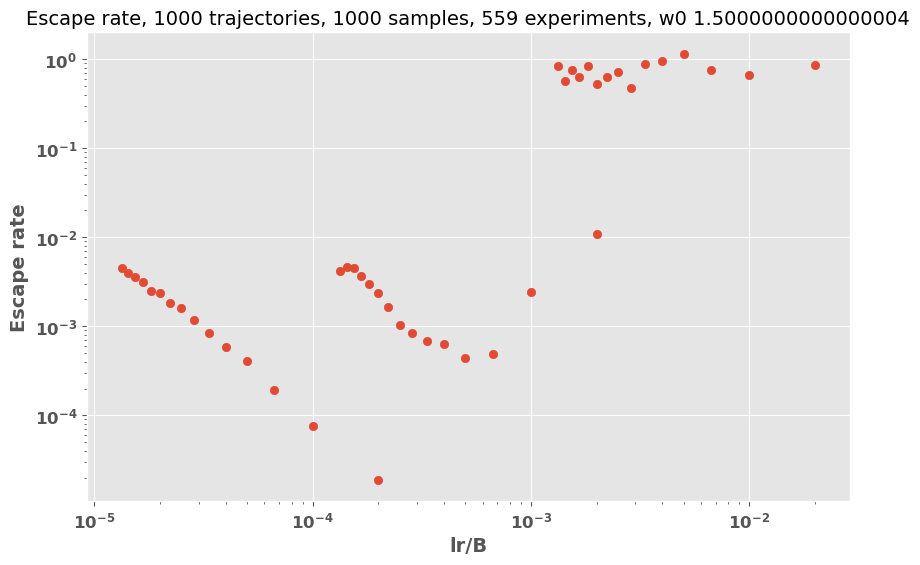

In [46]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
w0s = list(sorted(set(cleaned_df["w0"])) )
w0 = w0s[5]
cleaned_df["escape_rate"] = cleaned_df["escape_rate"].abs()
x = cleaned_df['lr/B'].loc[cleaned_df['w0'] == w0]
y = cleaned_df['escape_rate'].loc[cleaned_df['w0'] == w0]
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(x, y)

# Adding a colorbar to show the values of escape_rate

# Adding labels and title
plt.xlabel('lr/B')
plt.ylabel('Escape rate')
plt.yscale('log')
plt.xscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments, w0 {w0}')
plt.show()

In [47]:
print(len(batch_range))

15


In [ ]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
cleaned_df["escape_rate"] = cleaned_df["escape_rate"].abs()
escape_rate = cleaned_df["escape_rate"].
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(cleaned_df['w0'], cleaned_df['escape_rate'], c=cleaned_df['lr/B'], cmap='viridis', 
            norm=matplotlib.colors.LogNorm())

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='lr/B')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('Escape rate')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

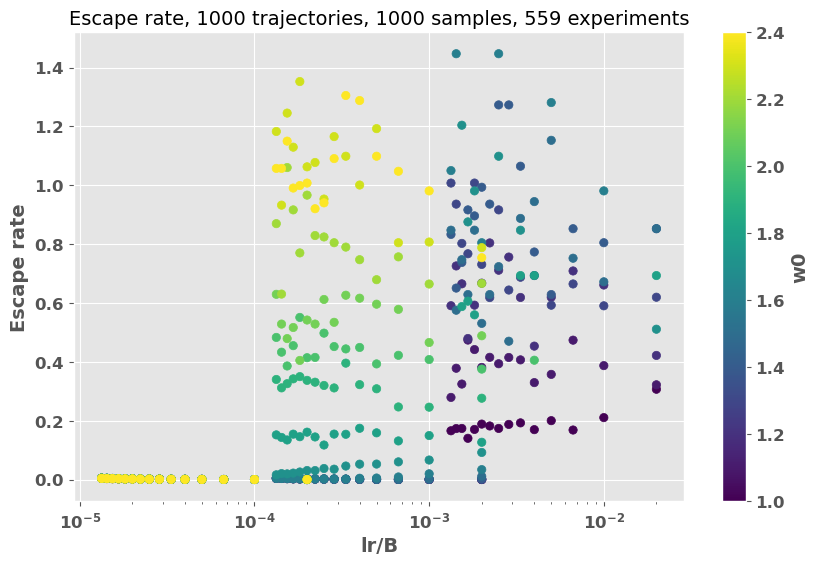

In [37]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
cleaned_df["escape_rate"] = cleaned_df["escape_rate"].abs()
tmax = len(cleaned_df)

# Create the scatter plot
plt.scatter(cleaned_df['lr/B'], cleaned_df['escape_rate'], c=cleaned_df['w0'], cmap='viridis')

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='w0')

# Adding labels and title
plt.xlabel('lr/B')
plt.ylabel('Escape rate')
plt.xscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

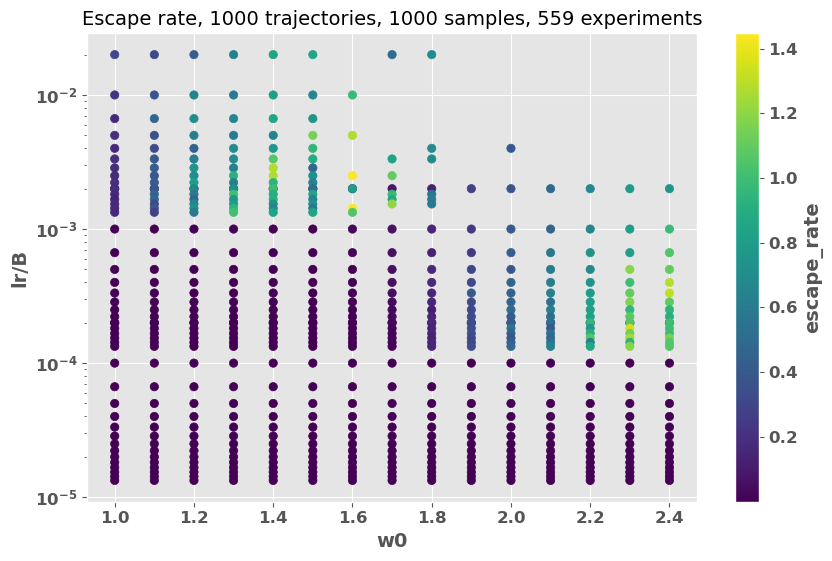

In [41]:
# Create the scatter plot
plt.scatter(cleaned_df['w0'], cleaned_df['lr/B'], c=cleaned_df['escape_rate'], cmap='viridis')

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='escape_rate')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('lr/B')
plt.yscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

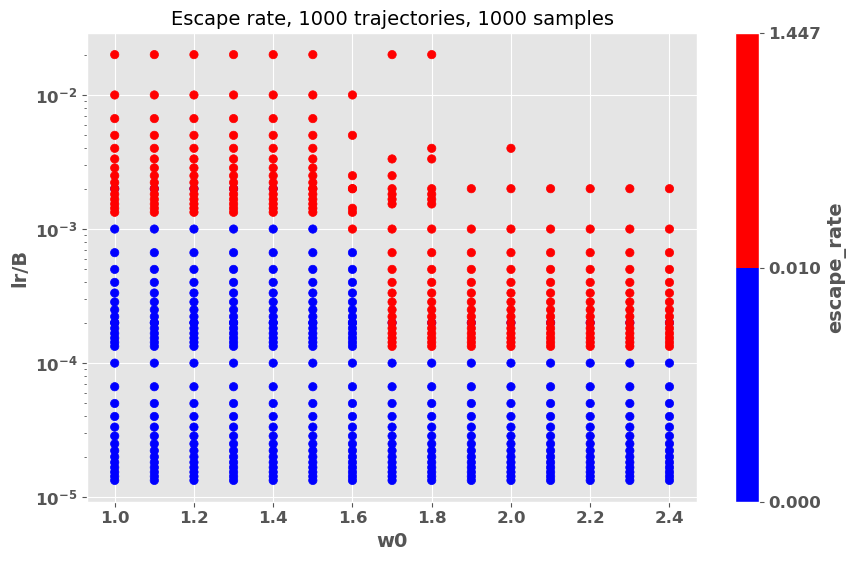

In [33]:
import matplotlib.colors as mcolors

# Assuming cleaned_df and other variables (nSGD, nsamples) are defined and available

# Define a custom color map with two colors, one for escape_rate > 0.1 and another for escape_rate < 0.1
colors = ['blue', 'red']  # Blue for escape_rate < 0.1, Red for escape_rate > 0.1
cmap = mcolors.ListedColormap(colors)
bounds = [0, 0.01, max(cleaned_df['escape_rate'])]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create the scatter plot with the custom colormap
plt.scatter(cleaned_df['w0'], cleaned_df['lr/B'], c=cleaned_df['escape_rate'], cmap=cmap, norm=norm)

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='escape_rate')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('lr/B')
plt.yscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples')
plt.show()


(array([20.64738454,  0.49454813,  0.12363703,  0.06181852,  0.3709111 ,
         0.92727775,  0.43272962,  0.06181852,  0.12363703,  0.12363703,
         0.24727407,  0.61818517,  0.18545555,  0.49454813,  0.61818517,
         0.3709111 ,  0.49454813,  0.18545555,  0.30909258,  0.24727407,
         0.43272962,  0.7418222 ,  0.3709111 ,  0.55636665,  0.18545555,
         0.3709111 ,  0.3709111 ,  0.55636665,  0.18545555,  0.3709111 ,
         0.24727407,  0.24727407,  0.3709111 ,  0.24727407,  0.43272962,
         0.        ,  0.43272962,  0.30909258,  0.        ,  0.18545555,
         0.12363703,  0.12363703,  0.        ,  0.18545555,  0.12363703,
         0.06181852,  0.06181852,  0.        ,  0.        ,  0.12363703]),
 array([1.53165593e-05, 2.89533899e-02, 5.78914632e-02, 8.68295365e-02,
        1.15767610e-01, 1.44705683e-01, 1.73643757e-01, 2.02581830e-01,
        2.31519903e-01, 2.60457977e-01, 2.89396050e-01, 3.18334123e-01,
        3.47272196e-01, 3.76210270e-01, 4.05148343e-

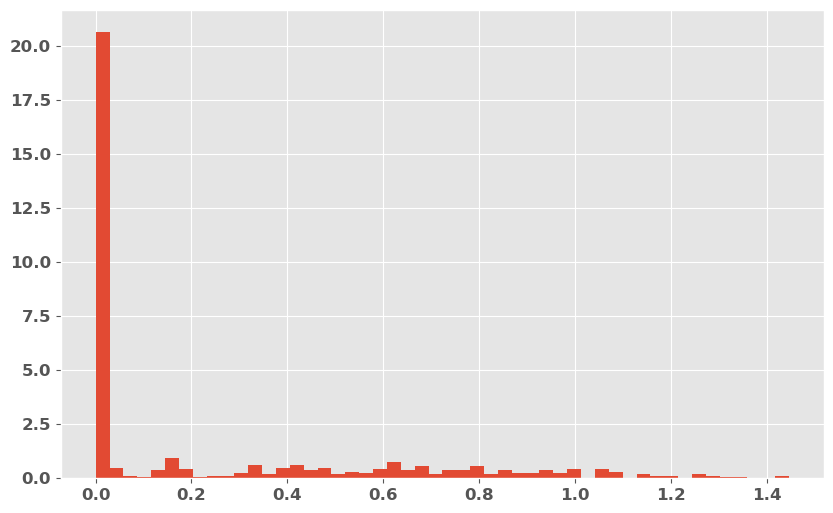

In [6]:
plt.hist(cleaned_df["escape_rate"].to_list(), bins= 50, density=True)

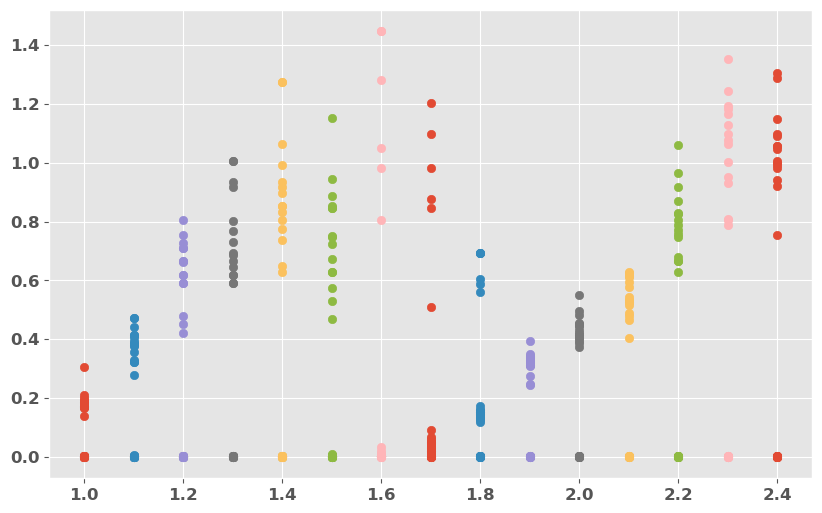

In [7]:
# Plot only by w0
for w0 in w0_range:
    x = cleaned_df["w0"].loc[cleaned_df["w0"]==w0].to_list()
    y = cleaned_df["escape_rate"].loc[cleaned_df["w0"]==w0].to_list()    
    plt.scatter(x, y)
    

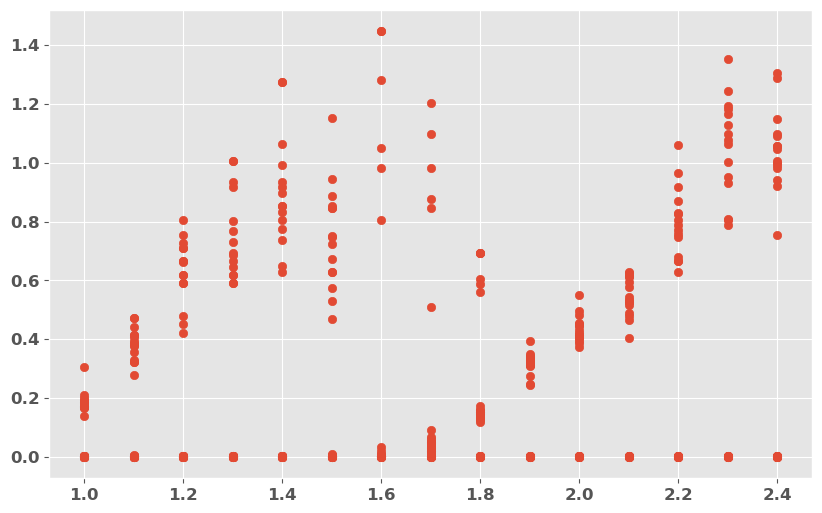

In [8]:
x = cleaned_df["w0"]
y = cleaned_df["escape_rate"]
plt.scatter(x,y)   

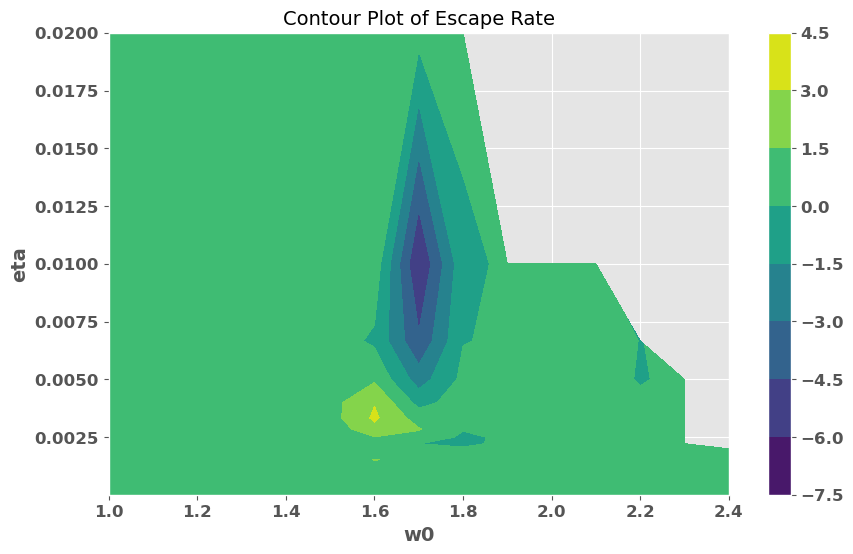

In [11]:
# Create a grid for interpolation
w0_unique = np.unique(cleaned_df['w0'])
eta_unique = np.unique(cleaned_df['lr/B'])
w0_range, lrB_range = np.meshgrid(w0_unique, eta_unique)

# Interpolate escape_rate values onto the grid
escape_rate_interpolated = griddata((cleaned_df['w0'], cleaned_df['lr/B']), cleaned_df['escape_rate'], (w0_range, lrB_range), method='cubic')

# Generate the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(w0_range, lrB_range, escape_rate_interpolated, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of Escape Rate')
plt.xlabel('w0')
plt.ylabel('lr/B')
plt.show()

